In [12]:
import pandas as pd
import numpy as np
import scipy as scipy
from scipy import stats


In [2]:
#Importing the csv from local folder
houses = pd.read_csv('housing.csv')
#A quick look at whats ciome in
houses.info

<bound method DataFrame.info of      Unnamed: 0     price  lotsize  bedrooms  bathrms  stories driveway  \
0             1   42000.0     5850         3        1        2      yes   
1             2   38500.0     4000         2        1        1      yes   
2             3   49500.0     3060         3        1        1      yes   
3             4   60500.0     6650         3        1        2      yes   
4             5   61000.0     6360         2        1        1      yes   
..          ...       ...      ...       ...      ...      ...      ...   
541         542   91500.0     4800         3        2        4      yes   
542         543   94000.0     6000         3        2        4      yes   
543         544  103000.0     6000         3        2        4      yes   
544         545  105000.0     6000         3        2        2      yes   
545         546  105000.0     6000         3        1        2      yes   

    recroom fullbase gashw airco  garagepl prefarea  
0        no  

In [4]:
#There are a lot of count columns and also a lot yes and no columns.
#So I will now construct two definitions to help sort this information later on

In [13]:
def tally_count(target): #used to tally count columns, target is the column concerned
    #initilise the variables
    cur_max = 0; cur_no = 0; count = 0; cur_no; max_of = 0
    max = target.max() #max value that object occurs e.g bedrooms
    len_col = len(target) #full length of column
    run_tot = [0]*max
    
    for i in range(len_col):
       
        for j in range(0,max):
            if target[i]==j:
               
                run_tot[j]= run_tot[j]+1 #totaling up each feature as how often found
                
                
    for k in range(0,max): #now counting up how often each object appears
        print("For ",k,target.name," there is quantity is ", run_tot[k])
        if run_tot[k] > max_of:
            max_of = run_tot[k]
            cur_no = k
    #Ouput the most common and precent
    print("For most common ",cur_no,target.name," precentage is ", max_of/(len_col/100),"%")
   
    return 

In [31]:
def tally_yes_no(target): #used to tally yes/no columns
    sum0 = 0; sum1 = 0
    len_col = len(target)
   
    for i in range(len_col):  #totaling up each feature as how often found
        if (target[i]=="yes"):
            sum0=sum0+1
        if (target[i]=="no"):
            sum1=sum1+1 
      
    total = sum0+sum1  #now counting up how often each object appears, noting its binary
    
    #Ouput the most common and precent
    print("yes %",sum0/(total/100),"no %",sum1/(total/100))
    
    print("no of yes's",sum0,"no of no's",sum1,"total ",total)
    return 

In [32]:
#Price and lot size being quantative data would be suitable for a quick look

In [33]:
#Lotsize, however this could be confounded with Stories and fullbase, more stories higher price, possibly less area?

In [20]:
#Now lets start by plotting price v lotsize

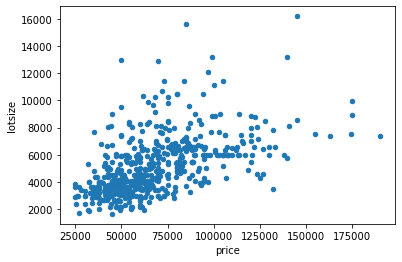

In [21]:
#Try price against lot size
houses.plot.scatter(x="price", y="lotsize");

In [22]:
#Maybe association, lets try a linear regression line
x = houses["price"]
y = houses["lotsize"]

res = stats.linregress(x, y)
print(res)
print("R sq val is ",0.54, "not great")

LinregressResult(slope=0.04350463911837908, intercept=2186.6600710851167, rvalue=0.5357956724321841, pvalue=6.769899509222409e-42, stderr=0.0029393968960298245)
R sq val is  0.54 not great


In [23]:
# Now move onto next column i,e. Bedrooms

In [13]:
target = houses["bedrooms"] # call count tally definition
tally_count(target)


For  0 bedrooms  there is quantity is  0
For  1 bedrooms  there is quantity is  2
For  2 bedrooms  there is quantity is  136
For  3 bedrooms  there is quantity is  301
For  4 bedrooms  there is quantity is  95
For  5 bedrooms  there is quantity is  10
For most common  3 bedrooms  precentage is  55.12820512820513 %


<AxesSubplot:>

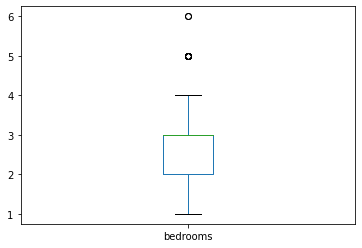

In [14]:
# Have a look at a boxplot
box_group = houses[["bedrooms"]]
box_group.plot.box()

In [36]:
#Quick check for an association
x = houses["price"]
y = houses["bedrooms"]
res2 = stats.linregress(x, y)
print(res2)
print("R sq val is ",0.37, "not great, so assume no correlation")

LinregressResult(slope=1.0119357059698813e-05, intercept=2.27585470097728, rvalue=0.3664473586641068, pvalue=8.533170549384768e-19, stderr=1.1016145929875764e-06)
R sq val is  0.37 not great


In [27]:
#Next Bathrooms

In [14]:
target = houses["bathrms"] # call count tally definition
tally_count(target)


For  0 bathrms  there is quantity is  0
For  1 bathrms  there is quantity is  402
For  2 bathrms  there is quantity is  133
For  3 bathrms  there is quantity is  10
For most common  1 bathrms  precentage is  73.62637362637362 %


In [29]:
#Next Driveways

In [24]:
target = houses["driveway"] # call yes/no tally definition
tally_yes_no(target)

yes % 85.8974358974359 no % 14.102564102564102
no of yes's 469 no of no's 77 total  546


In [ ]:
#So next choose prices with and without driveway to see if thers is an association

#Pull out relavent columns
price_with_drive_alldata = houses[["price","driveway"]]

#Select price with drive
price_with_drive = price_with_drive_alldata[["price"] & (price_with_drive_alldata["driveway"]=="yes")]
price_with_drive_only = price_with_drive["price"]
print("price with drive only",'\n',price_with_drive_only)
print("Length of with drive column",len(price_with_drive))

#Select price without drive
price_without_drive = price_with_drive_alldata[["price"] & (price_with_drive_alldata["driveway"]=="no")]
price_without_drive_only = price_without_drive["price"]
print("price without drive only",'\n',price_without_drive_only)
print("Length of without drive column",len(price_without_drive))

#So we have a col length of 469 and 77, try means
print("Mean of with drive column",price_with_drive.mean())
print("Mean of without drive column",price_without_drive.mean())
#Significent difference of means


In [31]:
#Gas water Heaters

In [38]:
target = houses["gashw"] # call yes/no tally definition
tally_yes_no(target)

yes % 4.5787545787545785 no % 95.42124542124542
no of yes's 25 no of no's 521 total  546


In [11]:
price_with_gashw_alldata = houses[["price","gashw"]]

#Pull out price with water heater and price without water heater fo comparision
price_with_gas_water =  price_with_gashw_alldata[["price"] & (price_with_gashw_alldata["gashw"]=="yes")]
print("Price with gas heating",price_with_gas_water.head())
print('\n')
price_without_gas_water = price_with_gashw_alldata[["price"] & (price_with_gashw_alldata["gashw"]=="no")]
print("Price without gas heating",price_without_gas_water.head())
print('\n')

#Finding the mean price with water heater
print("mean with",price_with_gas_water.mean())
#Finding the mean price without water heater
print("mean without",price_without_gas_water.mean())
print('\n')

#Finding the median price with water heater
print("median with",price_with_gas_water.median())
#Finding the median price without water heater
print("median without",price_without_gas_water.median())

#for Statistics lets check column lengths, we also know from just above we have an issue, n= 25 and n = 521
print('\n')
print("Length 1",price_with_gas_water.count())
print("Length 2",price_without_gas_water.count())


Price with gas heating         price gashw
53    95000.0   yes
102  125000.0   yes
103  132000.0   yes
116   93000.0   yes
125   95000.0   yes


Price without gas heating      price gashw
0  42000.0    no
1  38500.0    no
2  49500.0    no
3  60500.0    no
4  61000.0    no


mean with price    79428.0
dtype: float64
mean without price    67579.06334
dtype: float64


median with price    76900.0
dtype: float64
median without price    62000.0
dtype: float64


Length 1 price    25
gashw    25
dtype: int64
Length 2 price    521
gashw    521
dtype: int64


In [41]:
#We have the different n, but that is fine for normality, so first check for normality
# Step 1: Test for normality within the groups. We can use the Shapiro test for this
# Is p > 0.05 to assume normality?
print("Performing normality tests")
print(stats.shapiro(price_with_gas_water["price"]))
print(stats.shapiro(price_without_gas_water["price"]))

Performing normality tests
ShapiroResult(statistic=0.9445392489433289, pvalue=0.18832135200500488)
ShapiroResult(statistic=0.9187494516372681, pvalue=3.9396230295736555e-16)


In [51]:
# The columns are not normaly distributed and have unequal n values
# Null Hypothesis for this test is our medians are equal

#Continue with mann whitney test for non-normal and different n values

print("Performing mann whitney test for non normal data and unequal n")
x = price_with_gas_water["price"]
y = price_without_gas_water["price"]
scipy.stats.mannwhitneyu(x, y, use_continuity=True, alternative=None)


Performing mann whitnet test for non normal data


MannwhitneyuResult(statistic=4980.0, pvalue=0.023385630065073593)

In [ ]:
#"if p is low the null hypotheses must go" i,e. <0.05 so they medians are not equal

In [ ]:
#Number of Stories

In [15]:
target = houses["stories"] # call count tally definition
tally_count(target)

For  0 stories  there is quantity is  0
For  1 stories  there is quantity is  227
For  2 stories  there is quantity is  238
For  3 stories  there is quantity is  40
For most common  2 stories  precentage is  43.58974358974359 %


In [ ]:
#Recreation room

In [27]:
target = houses["recroom"] # call yes/no tally definition
tally_yes_no(target)

yes % 17.765567765567766 no % 82.23443223443223
no of yes's 97 no of no's 449 total  546


In [ ]:
#Full base? assume "full basement"

In [28]:
target = houses["fullbase"] # call yes/no tally definition
tally_yes_no(target)

yes % 34.981684981684985 no % 65.01831501831502
no of yes's 191 no of no's 355 total  546


In [ ]:
#Air conditioning

In [29]:
target = houses["airco"] # call yes/no tally definition
tally_yes_no(target)

yes % 31.684981684981686 no % 68.31501831501832
no of yes's 173 no of no's 373 total  546


In [ ]:
#Is there a correlation between air conditioning and gas water heaters? "if p is low the null hypotheses must go" i,e. <0.05 

In [5]:
obs = [[25,521],[173,373]] #The yes/no data for each column

In [7]:
scipy.stats.chi2_contingency(obs, correction=True, lambda_=None)

(133.30750457596096,
 7.743852183694094e-31,
 1,
 array([[ 99., 447.],
        [ 99., 447.]]))

In [ ]:
# so p is 7.743852183694094e-31, there is no correlation between aircon and gas water heating

In [ ]:
#Is there a garage?

In [16]:
target = houses["garagepl"] # call count tally definition
tally_count(target)

For  0 garagepl  there is quantity is  300
For  1 garagepl  there is quantity is  126
For  2 garagepl  there is quantity is  108
For most common  0 garagepl  precentage is  54.94505494505495 %


In [ ]:
#Prrferred area

In [30]:
target = houses["prefarea"] # call yes/no tally definition
tally_yes_no(target)

yes % 23.44322344322344 no % 76.55677655677655
no of yes's 128 no of no's 418 total  546


In [ ]:
#We could dice this data for hours, but I will just look at the most popolar configurations in this data

In [52]:
ideal_house = houses[(houses["price"]>0) & (houses["bedrooms"]==3) & (houses["bathrms"]==1) & (houses["stories"]==2) & (houses["driveway"] == "yes") & (houses["recroom"]=="no") & (houses["fullbase"] == "no") & (houses["gashw"] == "no") & (houses["airco"] == "no") & (houses["garagepl"] == 0) & (houses["prefarea"] == "no")]
print("Most common features house price",'\n',ideal_house[["price","bedrooms","bathrms","stories","driveway","recroom","fullbase","gashw","airco","garagepl","prefarea"]])

Most common features house price 
        price  bedrooms  bathrms  stories driveway recroom fullbase gashw  \
12   27000.0         3        1        2      yes      no       no    no   
49   54800.0         3        1        2      yes      no       no    no   
58   35500.0         3        1        2      yes      no       no    no   
59   30000.0         3        1        2      yes      no       no    no   
63   54000.0         3        1        2      yes      no       no    no   
73   34000.0         3        1        2      yes      no       no    no   
82   50000.0         3        1        2      yes      no       no    no   
131  44500.0         3        1        2      yes      no       no    no   
136  46000.0         3        1        2      yes      no       no    no   
139  43000.0         3        1        2      yes      no       no    no   
140  56000.0         3        1        2      yes      no       no    no   
181  50000.0         3        1        2      yes    

In [ ]:
#Please note that Lotsize data below needs to be ignored as its not linked correctly

In [53]:
ideal_house.count()

Unnamed: 0    17
price         17
lotsize       17
bedrooms      17
bathrms       17
stories       17
driveway      17
recroom       17
fullbase      17
gashw         17
airco         17
garagepl      17
prefarea      17
dtype: int64

In [54]:
ideal_house.min()

Unnamed: 0       13
price         25000
lotsize        1700
bedrooms          3
bathrms           1
stories           2
driveway        yes
recroom          no
fullbase         no
gashw            no
airco            no
garagepl          0
prefarea         no
dtype: object

In [55]:
ideal_house.max()

Unnamed: 0      340
price         63900
lotsize        6615
bedrooms          3
bathrms           1
stories           2
driveway        yes
recroom          no
fullbase         no
gashw            no
airco            no
garagepl          0
prefarea         no
dtype: object

In [ ]:
#Lotsize data needs to be ignored as its not linked correctly